Hadronic pp jet model
=====================

In [1]:
from jetset.jet_model import Jet
from jetset.jetkernel import jetkernel
from astropy import constants as const
from jetset.jet_emitters_factory import EmittersFactory
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_component(j_name,nu_name):
    j_nu_ptr=getattr(j._blob,j_name)
    nu_ptr=getattr(j._blob,nu_name)
    xg=np.zeros(j._blob.nu_grid_size)
    yg=np.zeros(j._blob.nu_grid_size)
    for i in range(j._blob.nu_grid_size):
        xg[i]=jetkernel.get_spectral_array(nu_ptr,j._blob,i)
        yg[i]=jetkernel.get_spectral_array(j_nu_ptr,j._blob,i)
    
    m=yg>0

    xg=xg[m]
    yg=yg[m]
    yg=yg*xg
    yg=yg*jetkernel.erg_to_TeV

    xg=xg*jetkernel.HPLANCK_TeV
    
    return xg,yg



In [3]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0


To get an hadronic jet with `pp` interaction, we set the `emitters_type='protons'`

In [4]:
j=Jet(emitters_distribution='plc',verbose=False,emitters_type='protons')
j.parameters.R.val=1E16
j.parameters.N.val=1000
j.parameters.B.val=1
j.parameters.z_cosm.val=0.001
j.parameters.beam_obj.val=20


In [5]:

j.eval()
j.show_model()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_hadronic_pp  

protons distribution:
 type: plc  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:PP_gamma, state: on
   name:PP_neutrino_tot, state: on
   name:PP_neutrino_mu, state: on
   name:PP_neutrino_e, state: on
   name:Bremss_ep, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_hadronic_pp,R,region_size,cm,1.000000e+16,1.000000e+03,1.000000e+30,False,False
jet_hadronic_pp,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_hadronic_pp,B,magnetic_field,gauss,1.000000e+00,0.000000e+00,--,False,False
jet_hadronic_pp,beam_obj,beaming,lorentz-factor*,2.000000e+01,1.000000e-04,--,False,False
jet_hadronic_pp,z_cosm,redshift,,1.000000e-03,0.000000e+00,--,False,False
jet_hadronic_pp,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_hadronic_pp,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_hadronic_pp,N,emitters_density,1 / cm3,1.000000e+03,0.000000e+00,--,False,False
jet_hadronic_pp,NH_pp,target_density,1 / cm3,1.000000e+00,0.000000e+00,--,False,False
jet_hadronic_pp,gamma_cut,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


In [6]:
gmin=1.0/jetkernel.MPC2_TeV
m=j.emitters_distribution.gamma_p>=gmin
print('U(p) (erg/cm3) =',j.emitters_distribution.eval_U(gmin=gmin))

U(p) (erg/cm3) = 5.257679637585933


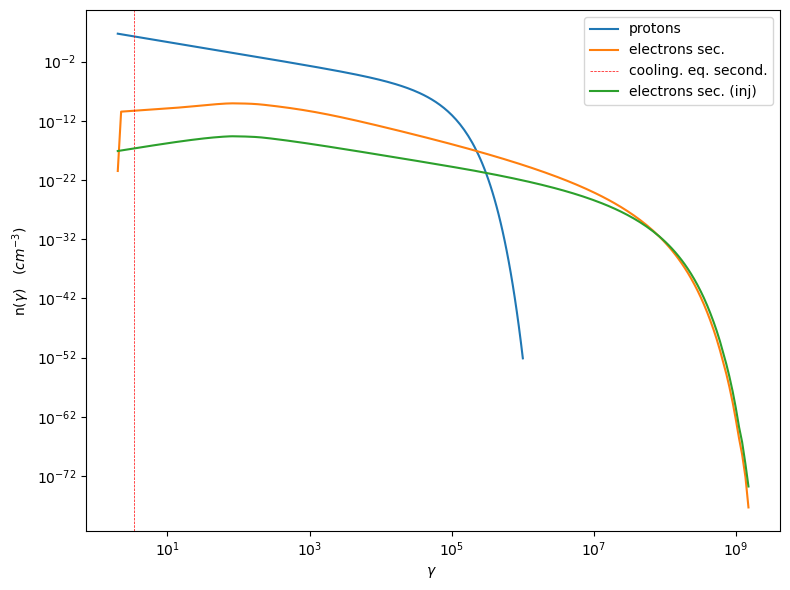

In [7]:
%matplotlib inline
p=j.emitters_distribution.plot()

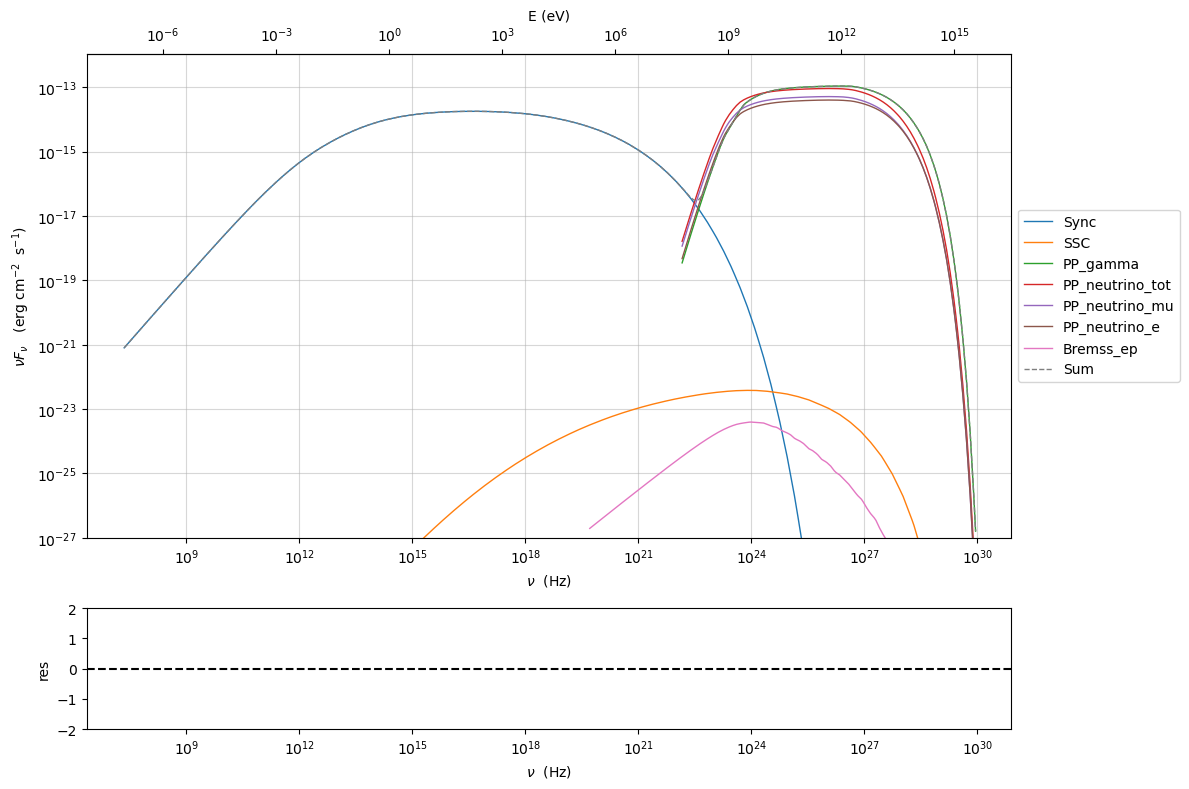

In [8]:
%matplotlib inline
p=j.plot_model()
p.setlim(y_min=1E-27)

## Jet pp Consistency with Kelner 2006


In [9]:
j=Jet(emitters_distribution='plc',verbose=False,emitters_type='protons')
j.parameters.z_cosm.val=z=0.001
j.parameters.beam_obj.val=10
j.parameters.gamma_cut.val=1000/(jetkernel.MPC2_TeV)
j.parameters.NH_pp.val=1
j.parameters.N.val=1
j.parameters.p.val=2.0
j.parameters.B.val=1.0
j.parameters.R.val=1E18
j.parameters.gmin.val=1
j.parameters.gmax.val=1E8
j.set_emiss_lim(1E-60)
j.set_IC_nu_size(100)
j.gamma_grid_size=200
j.nu_max=1E31


In [10]:
gamma_sec_evovled=np.copy(j.emitters_distribution.gamma_e)
n_gamma_sec_evovled=np.copy(j.emitters_distribution.n_gamma_e)
gamma_sec_inj=np.copy(j.emitters_distribution.gamma_e_second_inj)
n_gamma_sec_inj=np.copy(j.emitters_distribution.n_gamma_e_second_inj)


In [11]:
gmin=1.0/jetkernel.MPC2_TeV
j.set_N_from_U_emitters(1.0, gmin=gmin)
j.eval()
j.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_hadronic_pp  

protons distribution:
 type: plc  
 gamma energy grid size:  201
 gmin grid : 1.000000e+00
 gmax grid : 1.000000e+08
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-60
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:PP_gamma, state: on
   name:PP_neutrino_tot, state: on
   name:PP_neutrino_mu, state: on
   name:PP_neutrino_e, state: on
   name:Bremss_ep, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+31

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_hadronic_pp,R,region_size,cm,1.000000e+18,1.000000e+03,1.000000e+30,False,False
jet_hadronic_pp,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_hadronic_pp,B,magnetic_field,gauss,1.000000e+00,0.000000e+00,--,False,False
jet_hadronic_pp,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_hadronic_pp,z_cosm,redshift,,1.000000e-03,0.000000e+00,--,False,False
jet_hadronic_pp,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_hadronic_pp,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
jet_hadronic_pp,N,emitters_density,1 / cm3,1.058009e+02,0.000000e+00,--,False,False
jet_hadronic_pp,NH_pp,target_density,1 / cm3,1.000000e+00,0.000000e+00,--,False,False
jet_hadronic_pp,gamma_cut,turn-over-energy,lorentz-factor*,1.065789e+06,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


In [12]:
m=j.emitters_distribution.gamma_p>=gmin
print('U(p) (erg/cm3) =',j.emitters_distribution.eval_U(gmin=gmin))

U(p) (erg/cm3) = 1.0


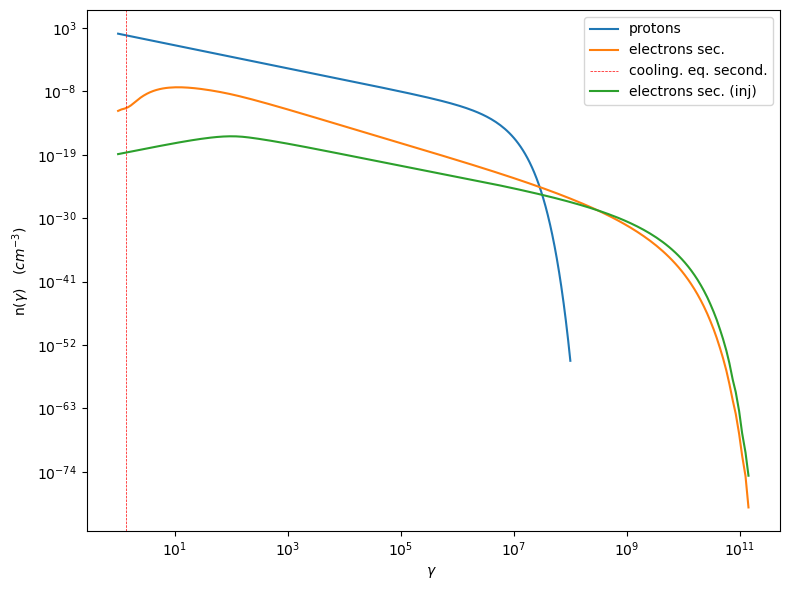

In [13]:
%matplotlib inline
p=j.emitters_distribution.plot()

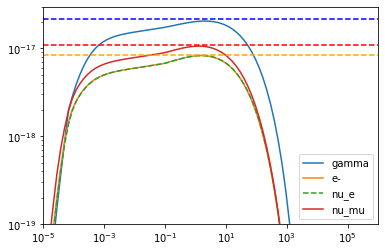

In [14]:
#Fig 12 Kelner 2006
%matplotlib inline


#j_nu_pp rate
xg,yg= get_component('j_pp_gamma','nu_pp_gamma')
x_nu_e,y_nu_e= get_component('j_pp_neutrino_e','nu_pp_neutrino_e')
x_nu_mu,y_nu_mu= get_component('j_pp_neutrino_mu','nu_pp_neutrino_mu')
x_nu_tot,y_nu_tot= get_component('j_pp_neutrino_tot','nu_pp_neutrino_tot')
x_nu_mu_2=x_nu_mu
y_nu_2=(y_nu_tot-y_nu_mu)*np.pi*4
x_nu_mu_1=x_nu_mu
y_nu_mu_1=(y_nu_mu-y_nu_2)*np.pi*4

yg=yg*np.pi*4
y_nu_mu=y_nu_mu*np.pi*4
y_nu_e=y_nu_e*np.pi*4
#e-  rate
x_inj=np.copy(j.emitters_distribution.gamma_e_second_inj)
y_inj=np.copy(j.emitters_distribution.n_gamma_e_second_inj)
y_e=y_inj*x_inj*x_inj*jetkernel.MEC2_TeV
x_e=x_inj*0.5E6/1E12

plt.loglog(xg,yg,label='gamma')
plt.loglog(x_e,y_e,label='e-')
plt.loglog(x_nu_e,y_nu_e,'--',label='nu_e')
plt.loglog(x_nu_mu,y_nu_mu,label='nu_mu')

#plt.loglog(x_nu_mu_1,y_nu_mu_1,label='nu_mu_1')

plt.ylim(1E-19,3E-17)#
plt.xlim(1E-5,1E6)

plt.legend()
plt.axhline(2.15E-17,ls='--',c='b')
plt.axhline(8.5E-18,ls='--',c='orange')
plt.axhline(1.1E-17,ls='--',c='r')


(10.0, 175.0)

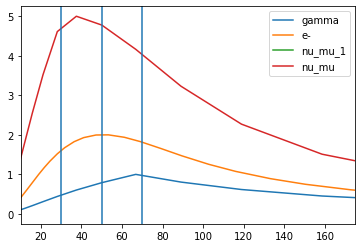

In [15]:
#Fig 14 left panel
%matplotlib inline
y1=yg/(xg*xg)
plt.plot(xg*1E6,y1/y1.max(),label='gamma')

y1=y_e/(x_e*x_e)
m=y_e>0
plt.plot(x_e[m]*1E6,2*y1[m]/y1[m].max(),label='e-')

#y1=y_nu_tot/(x_nu_tot*x_nu_tot)
#m=y1>0
#plt.plot(x_nu_tot[m]*1E6,3*y1[m]/y1[m].max(),label='nu_tot')
y1=y_nu_mu_1/(x_nu_mu_1*x_nu_mu_1)
m=y1>0
plt.plot(x_nu_mu_1[m]*1E6,4*y1[m]/y1[m].max(),label='nu_mu_1')

y1=y_nu_mu/(x_nu_mu*x_nu_mu)
m=y1>0
plt.plot(x_nu_mu[m]*1E6,5*y1[m]/y1[m].max(),label='nu_mu')

#plt.xlim(1E-5,2E2)
plt.axvline(70)
plt.axvline(50)
plt.axvline(30)
plt.legend()
plt.xlim(10,175)
